In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation as am
from matplotlib import cm
from kuramoto import * # import the kuramoto classes from file 
from utils import *

## First, we do some 1D simulations.  

In [2]:
# Set up model parameters 
epsilon = 1
eta = -0.45
sigmas = np.array([0.01, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6])
mean_omega = 0


# Set up simulation parameters 
L = 160
T = 1e4 # total time of the simulation 
n_frames = 1e4 # number of time points recorded in the end 
grad = 1
grads = [-grad, grad]

In [73]:
data = [] 
omegas = [] 
models = [] 
seed = 100


for (i, sigma) in enumerate(sigmas): 
    # Initialise the model and run the simulation 
    init = np.zeros(L)
    model = Kuramoto(epsilon, eta, sigma, mean_omega, BC='grad', grad=grads)
    model.initialise(L, T, n_frames, init=init, seed=seed) 
    model.evolve() # this runs the simulation, set verbose to True to see output at every time step 
    
    phases = np.copy(model.res[-1]) % (2*np.pi)
    shift(phases)
    data.append(phases)
    omegas.append(model.omegas)
    models.append(model)

100%|██████████| 10000/10000 [00:54<00:00, 182.15it/s]


In [74]:
np.save('Sims/data_inf_sigma_eta={}.npy'.format(eta), data)

In [3]:
data = np.load('Sims/data_inf_sigma_eta={}.npy'.format(eta))

slope:  0.13481529414898583
slope:  0.25477376670585805
slope:  0.38687558957396806
slope:  0.37223701887285515
slope:  0.552726802851766
slope:  0.6415932469700231
slope:  0.6457736481770292
slope:  0.6345444897808403
slope:  0.6451518252421329
slope:  0.6760248565523183
slope:  0.6084620943088628


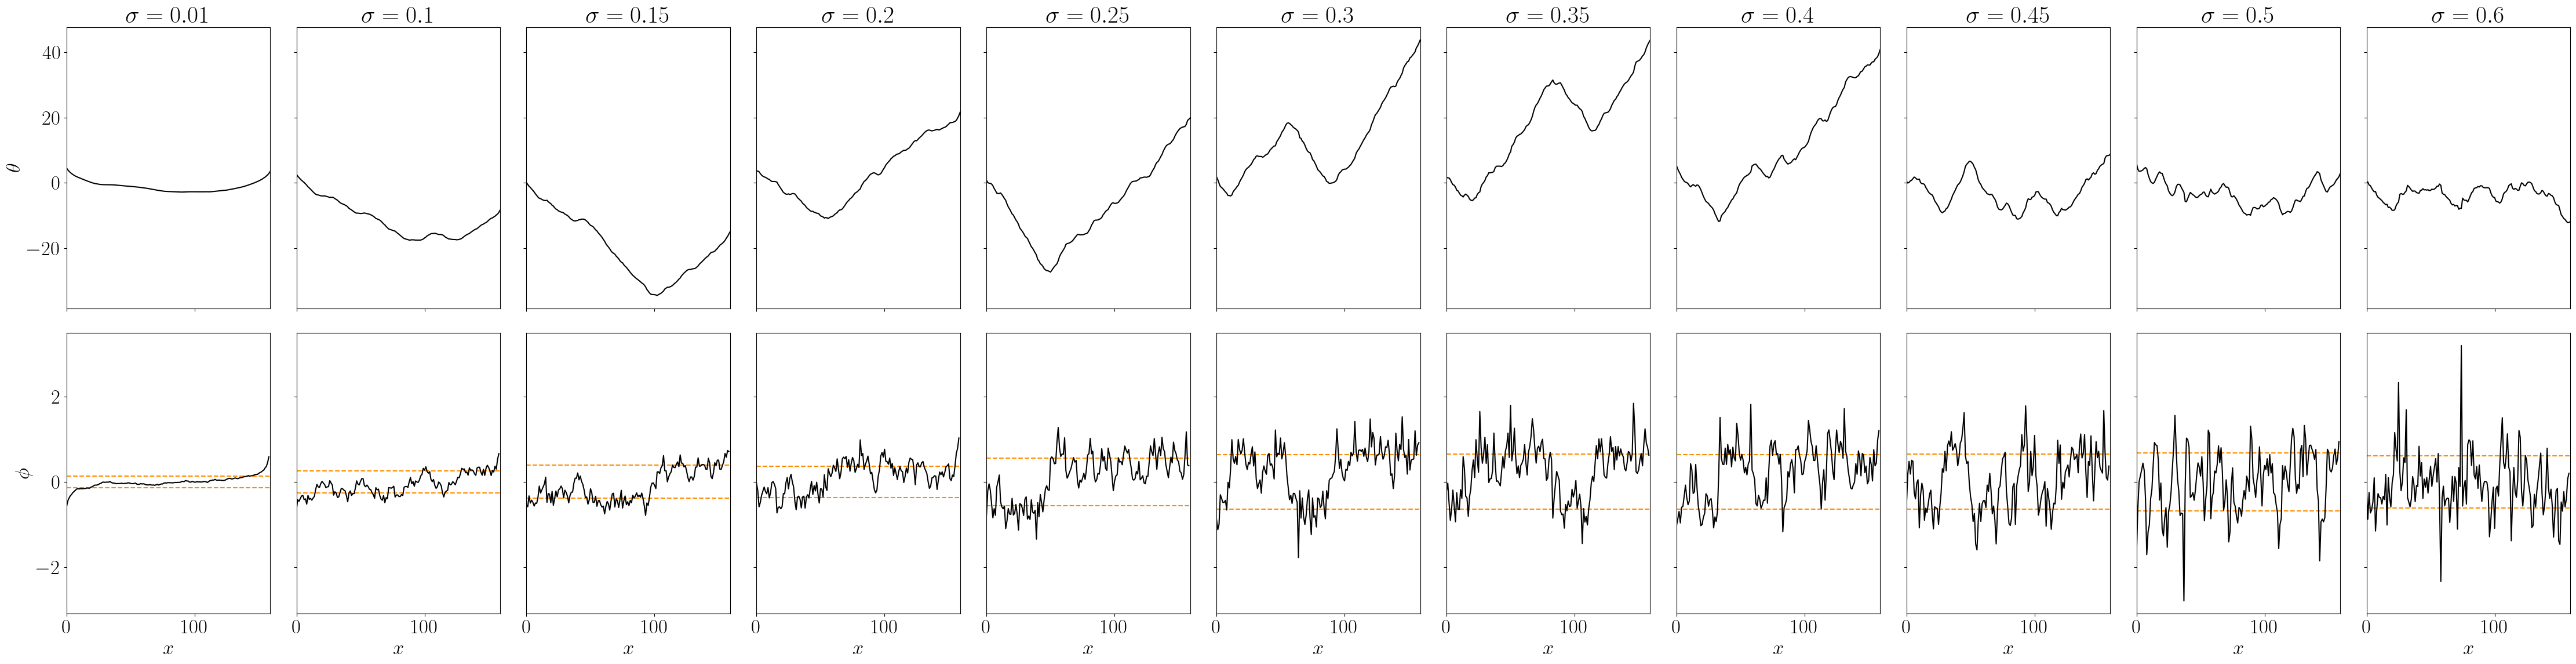

In [5]:
f = 11

plt.rc('text', usetex=True)
plt.rc('font', size=25, family='serif')
fig, axes = plt.subplots(2, len(sigmas[:f]), sharey='row', sharex=True, figsize=(4*len(sigmas[:f])+1, 12))

for (i, sigma) in enumerate(sigmas[:f]):
    axes[0, i].plot(data[i], 'k-')    
    
    v = data[i][1:]-data[i][:-1]
    s = np.sqrt(2*np.mean(1-np.cos(v)))
    axes[1, i].axhline(y=s, color='darkorange', linestyle='--')
    axes[1, i].axhline(y=-s, color='darkorange', linestyle='--')
    axes[1, i].plot(v, 'k-')
    axes[1, i].set_xlabel(r'$x$')
    print('slope: ', s)
    

axes[0, 0].set_ylabel(r'$\theta$')
axes[1, 0].set_ylabel(r'$\phi$')
plt.xlim([0, L-1])

for i in range(len(sigmas)):
    axes[0, i].set_title(r'$\sigma={}$'.format(sigmas[i]))
plt.savefig('Figures/sim.pdf')
plt.tight_layout()
plt.show() 

eta:  -0.4286121053305547 , error:  0.009578541440792614 0.013218387188293807
sigma:  0.009948164574391157 , error:  0.0007888510877237729 0.0010965030119360446
grad:  1.4004194190104498 , error:  0.03959261864813203 0.2827433388230814


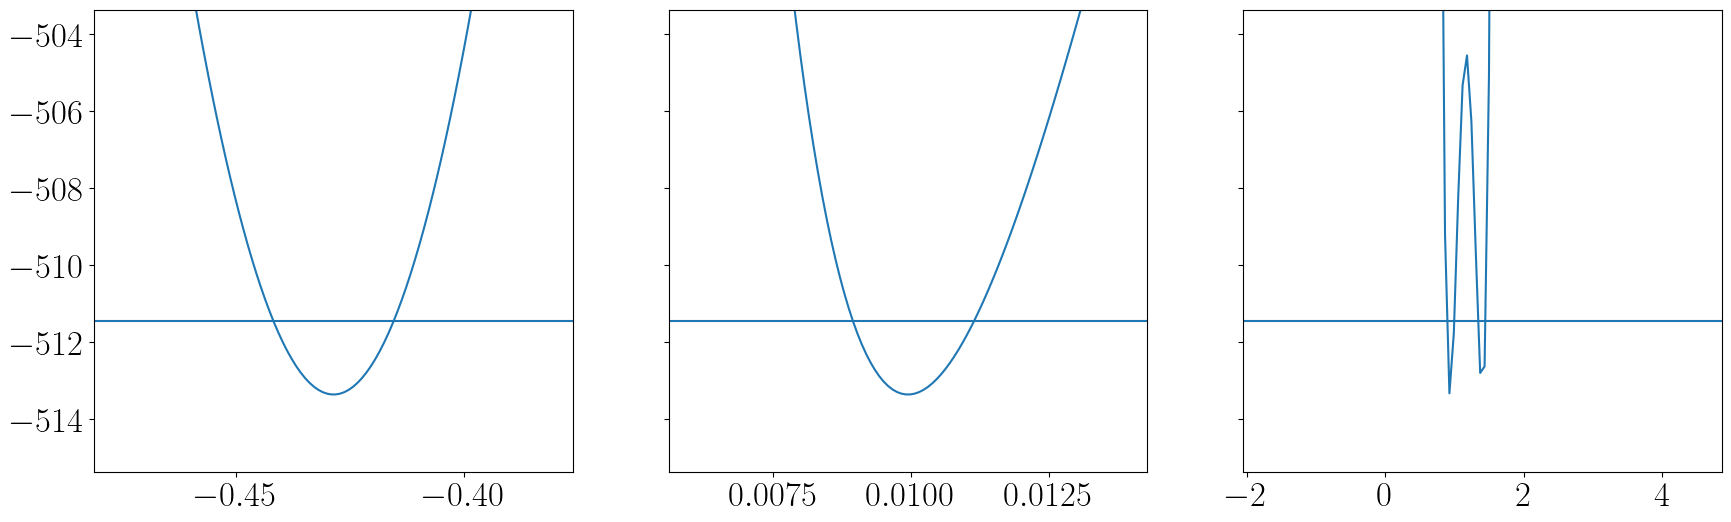

eta:  -0.4576079497259488 , error:  0.10330027862178624 0.142554384498065
sigma:  0.09449211246898692 , error:  0.007493702538568068 0.010416246528609617
grad:  1.1416675860778747 , error:  0.49529574014208466 0.43982297150257105


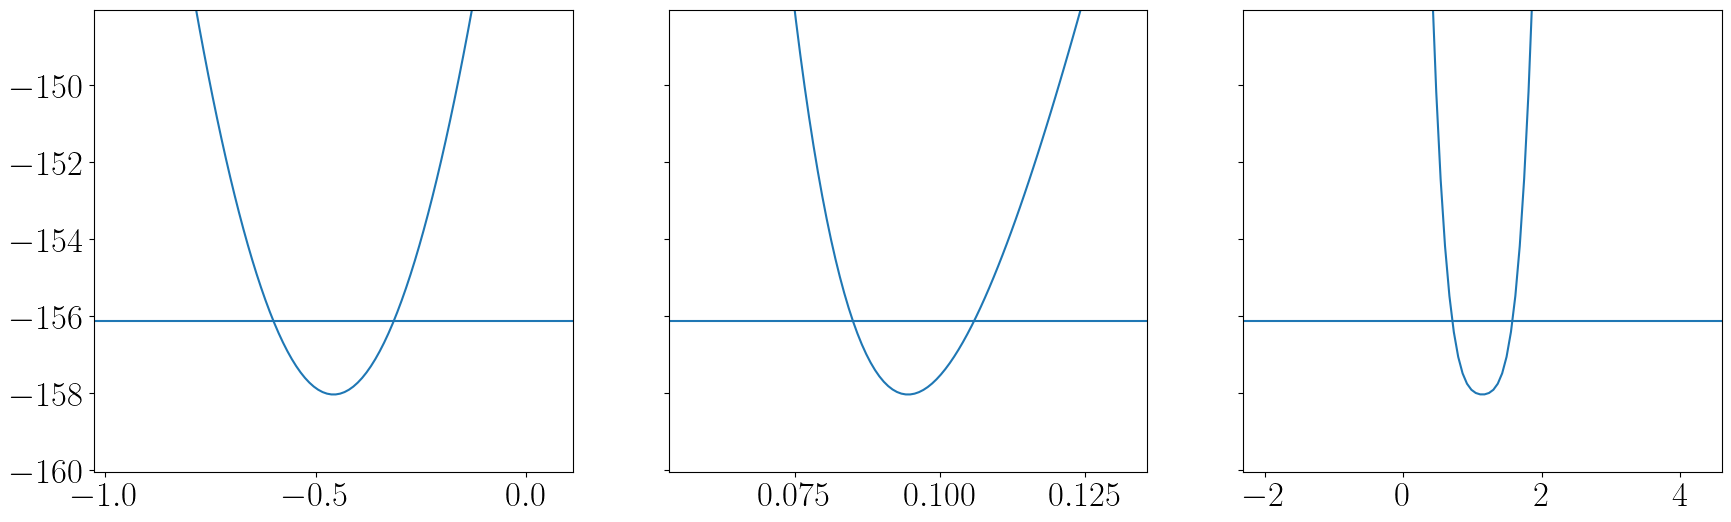

eta:  -0.5611032125329458 , error:  0.13342469764429182 0.18412608274912273
sigma:  0.15842808689061638 , error:  0.012564158614876956 0.01746418047467897
grad:  1.059455172949559 , error:  0.7928974778557067 0.578053048260522


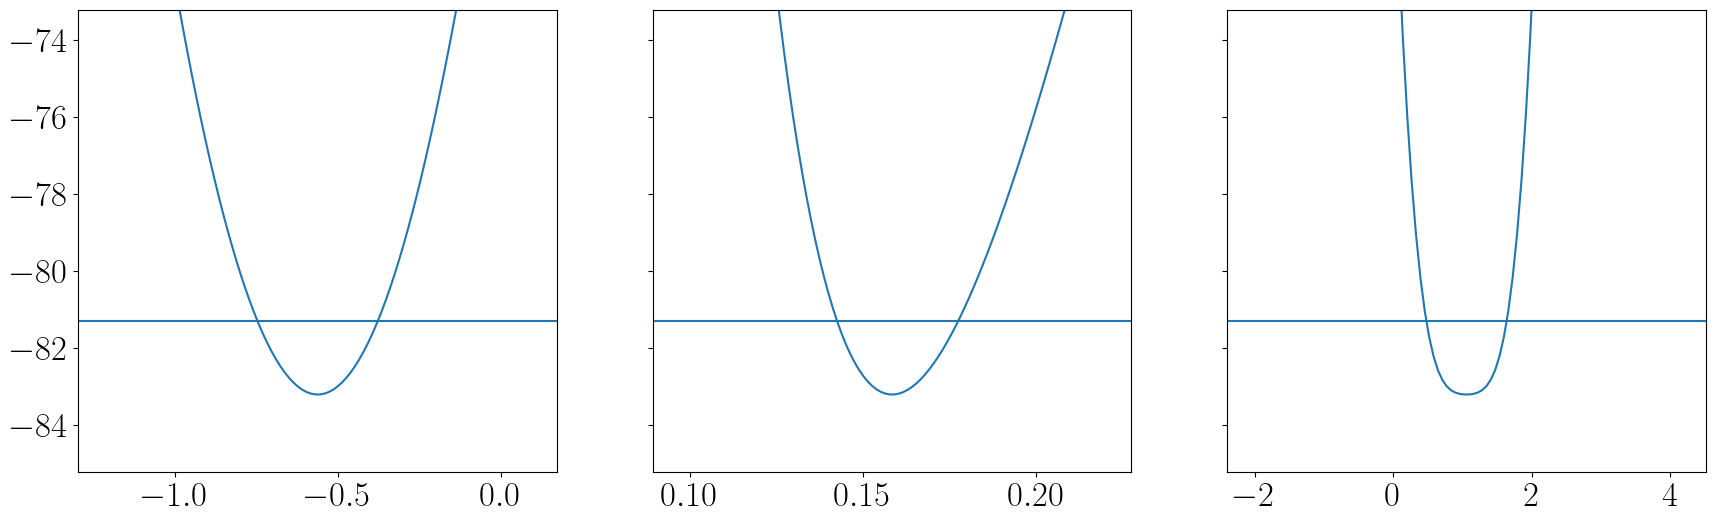

eta:  -0.5542328044594563 , error:  0.15148286929169183 0.2090463596225347
sigma:  0.2068513781721028 , error:  0.016404376669299097 0.022802083570325746
grad:  0.6854499358499563 , error:  0.49172373284956833 0.8293804605477054


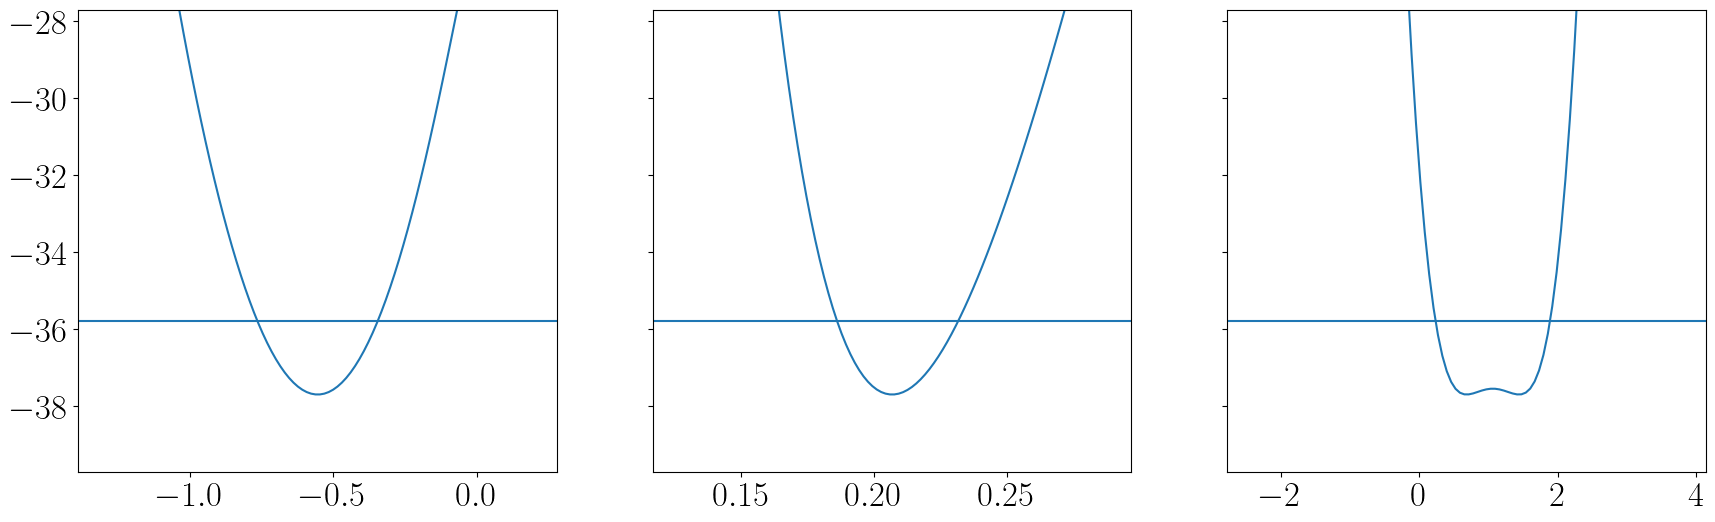

eta:  -0.43114590823074395 , error:  0.10229007674479922 0.14218320667527093
sigma:  0.25932181613696276 , error:  0.020565554385017403 0.028586120595174194
grad:  0.5938231696699058 , error:  0.4441228634954922 1.0367255756846319


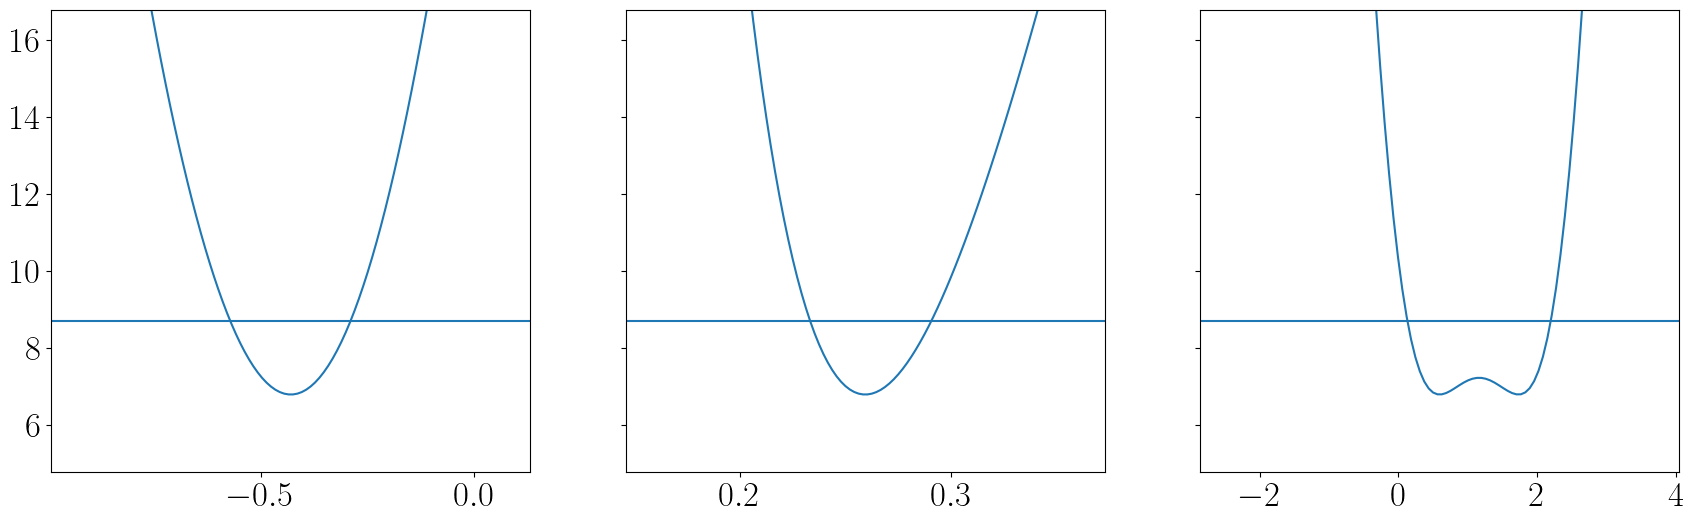

eta:  -0.2594942658909887 , error:  0.06744936370562986 0.12208334830719005
sigma:  0.29278420206383055 , error:  0.023219294344021806 0.03227481913819032
grad:  1.3168760599455613 , error:  3.1237342919642668 0.9047786842338604


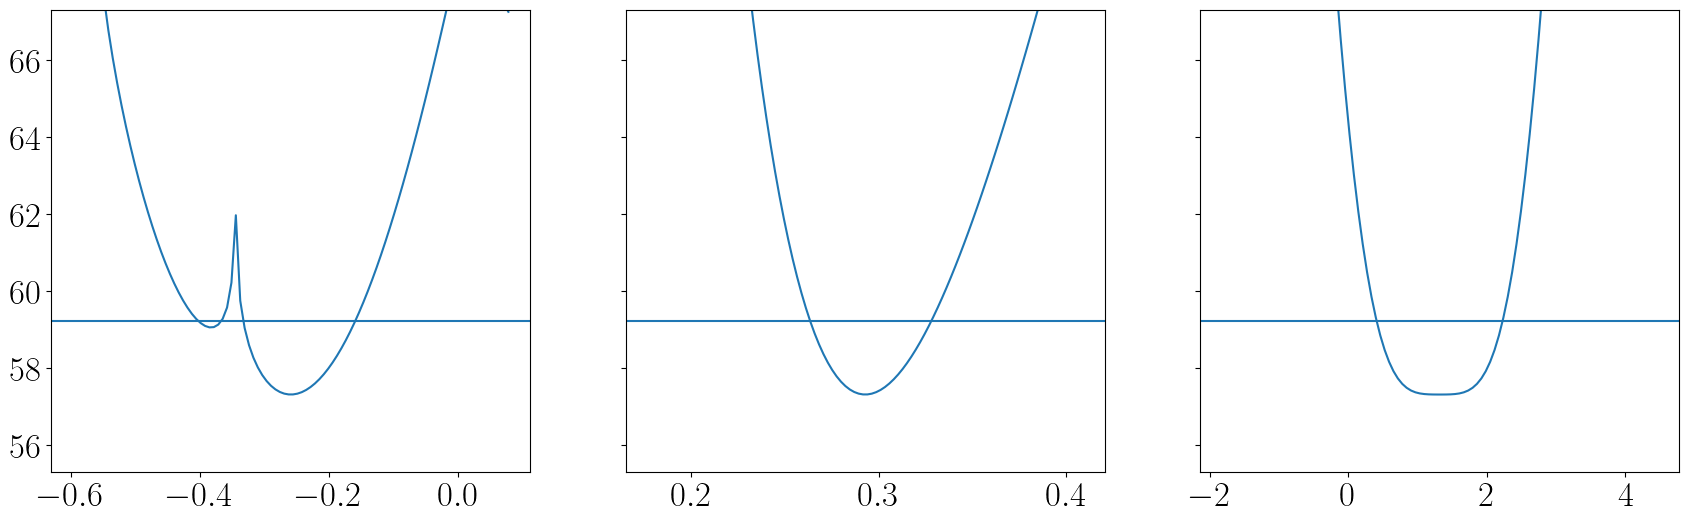

eta:  -0.3552792964022753 , error:  0.05876967159397662 0.07581287635622984
sigma:  0.3488904450915513 , error:  0.027668809655172325 0.03845964542068954
grad:  2.139686181823964 , error:  0.4189507142008538 1.413716694115407


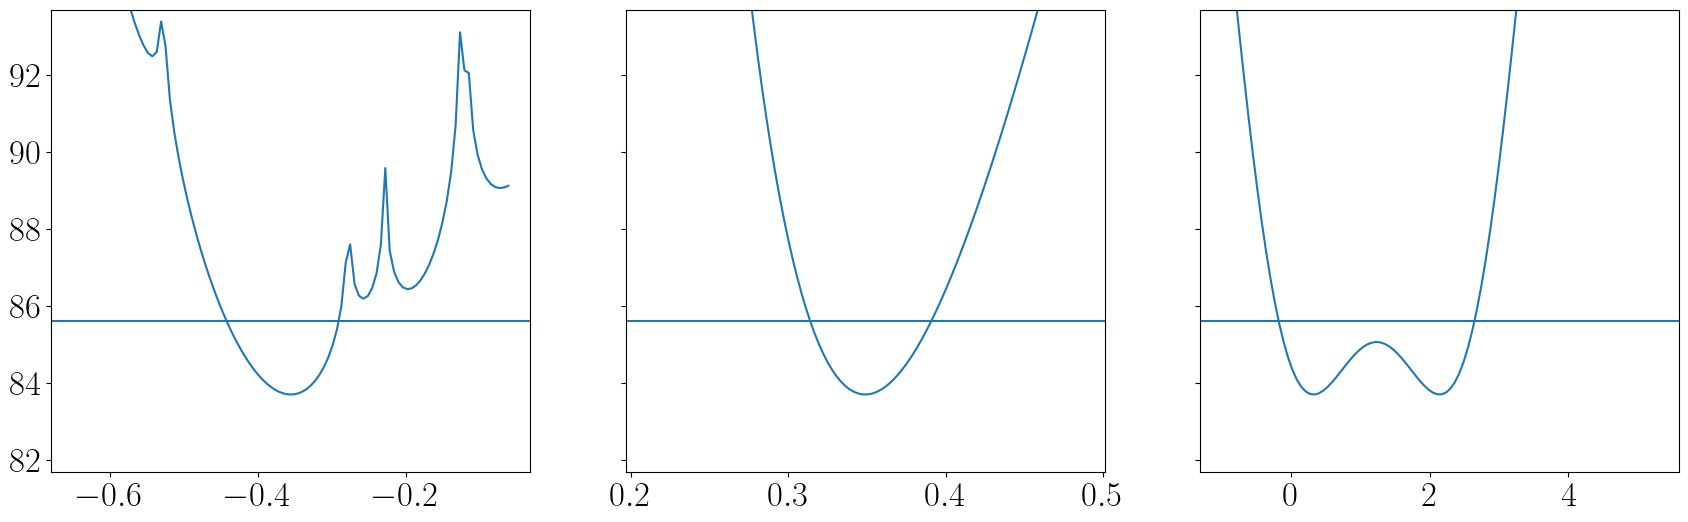

eta:  -0.5270328303511441 , error:  0.08138179950195118 0.1391628771483365
sigma:  0.37825412687501947 , error:  0.029997501631965674 0.04169652726843229
grad:  1.0857686528638282 , error:  0.5766630365621415 0.7037167544041137


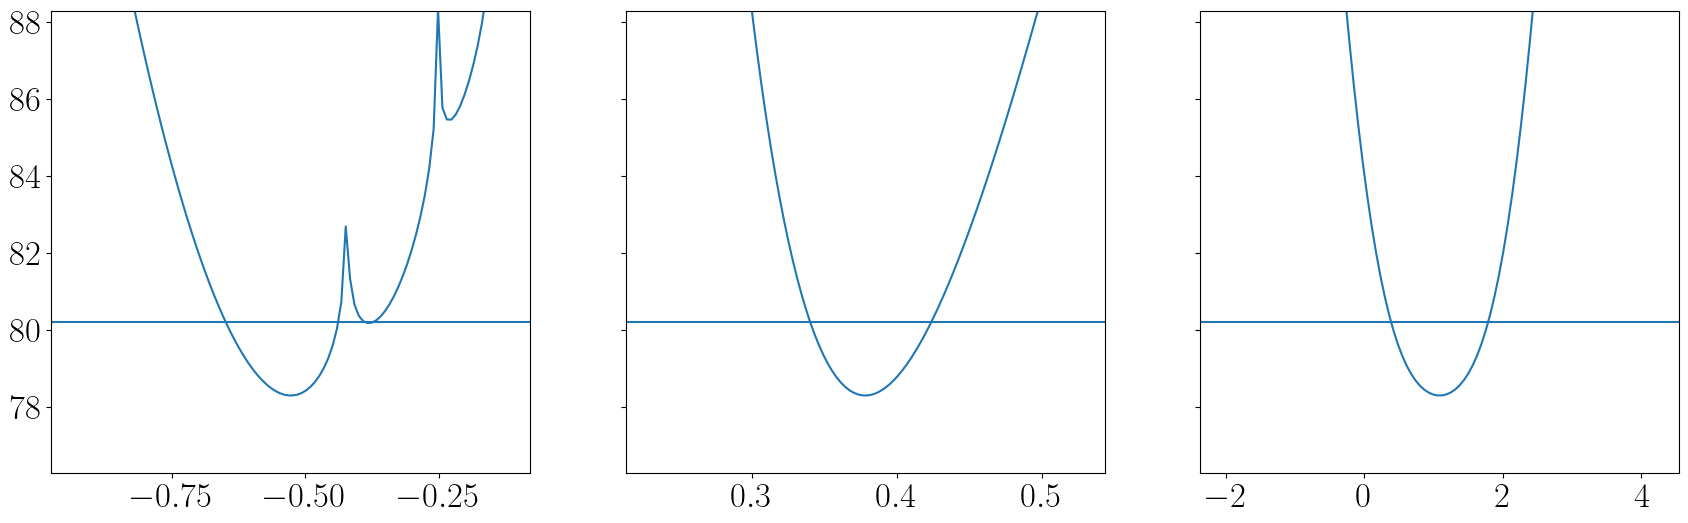

eta:  -0.1875361032568197 , error:  0.06018979064633414 0.07583913621438103
sigma:  0.39794939083215186 , error:  0.03155943856873879 0.04386761961054691
grad:  2.374600933462032 , error:  0.47104344638792084 1.5645131414877171


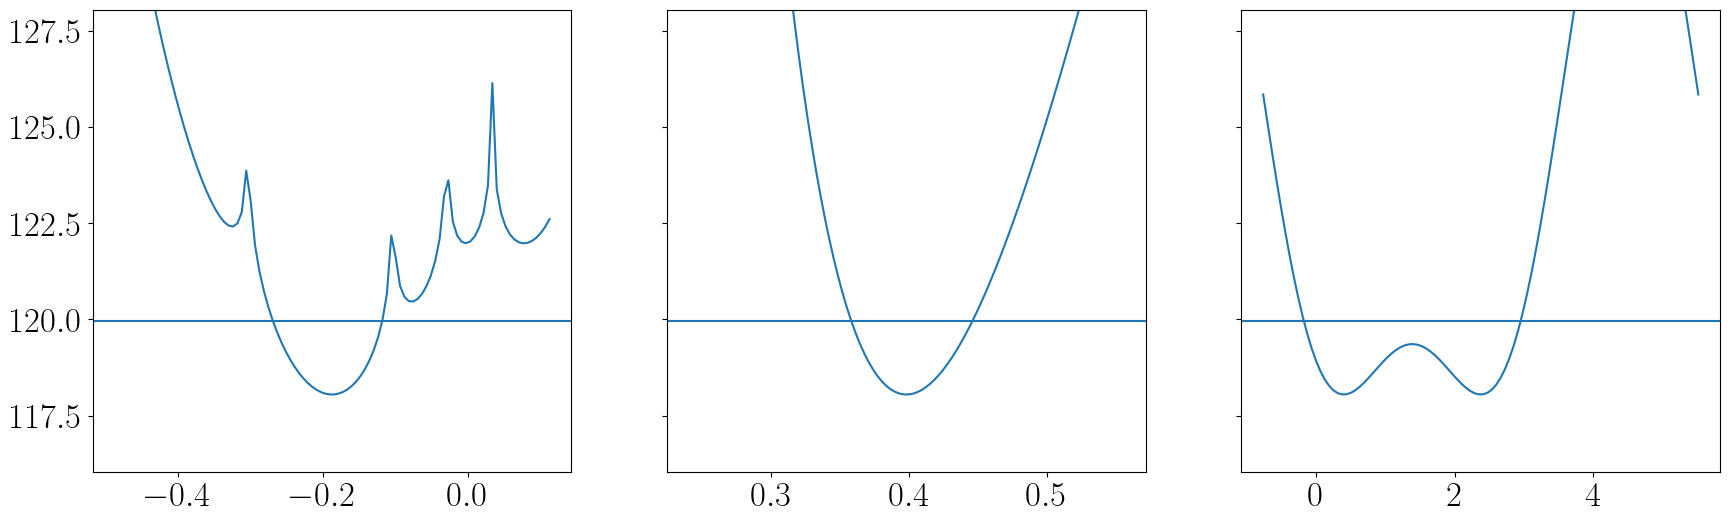

eta:  -0.2310421162787382 , error:  0.061233227805220405 0.07960319614678653
sigma:  0.4570879709599007 , error:  0.03624943695787193 0.05038671737144198
grad:  1.3437166516396188 , error:  1.0470768085220927 1.0053096491487339


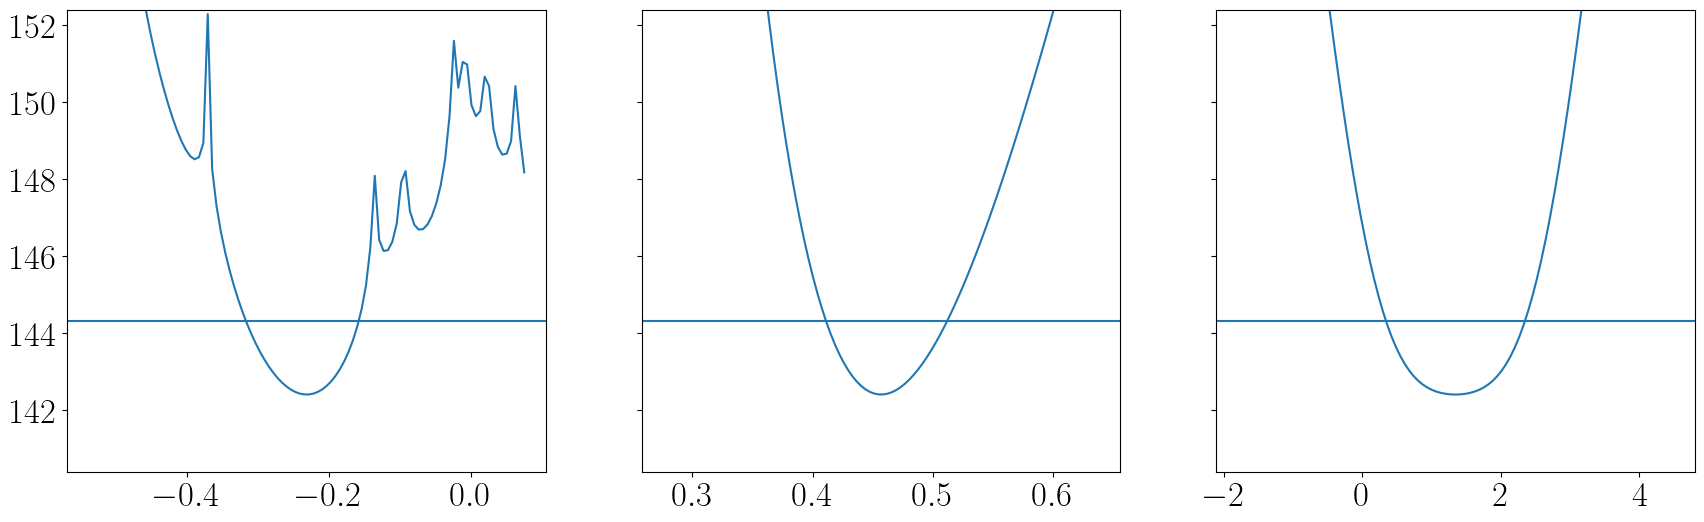

eta:  0.19182213037704698 , error:  0.08300499992222872 0.1037562499027859
sigma:  0.4875507603586959 , error:  0.03866529224725926 0.05374475622369037
grad:  0.24629063539009305 , error:  0.48261874643483266 3.141592653589793


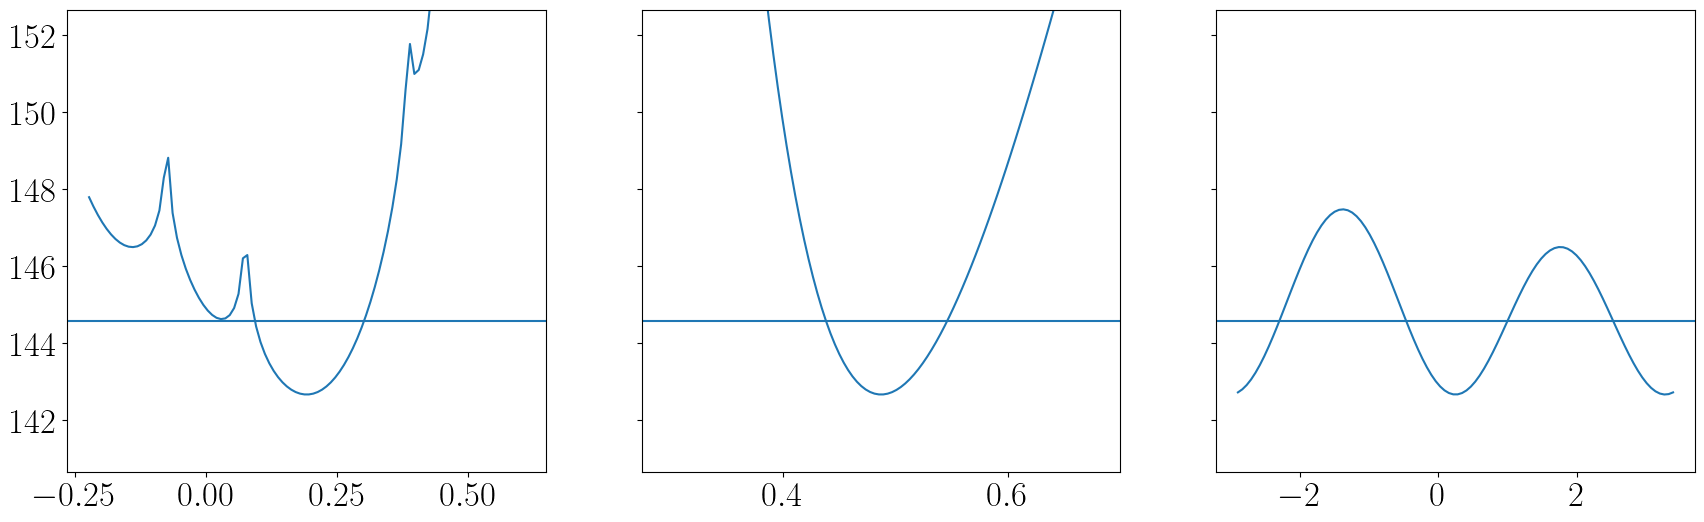

In [6]:
sigmas_map = [] 
sigmas_err_hess = [] 
sigmas_err_brute = []


for theta_smooth in data: 

    phi = theta_smooth[1:] - theta_smooth[:-1]
    
    eta, grad = MAP(phi)
    sigma = get_MAP_sigma(phi, eta, grad)
    errs_hess = 2*np.array(errors_hess(phi, eta, sigma, grad, diff=1e-4))
    widths = errs_hess*5
    widths[-1] = np.pi 
    errs_brute = errors_brute(phi, eta, sigma, grad, diff=widths)
    print('eta: ', eta, ', error: ', errs_hess[0], errs_brute[0])
    print('sigma: ', sigma, ', error: ', errs_hess[1], errs_brute[1])
    print('grad: ', grad, ', error: ', errs_hess[2], errs_brute[2])
    plot_cost(phi, eta, sigma, grad, widths=widths)
    
    sigmas_map.append(sigma)
    sigmas_err_hess.append(errs_hess[1])
    sigmas_err_brute.append(errs_brute[1])

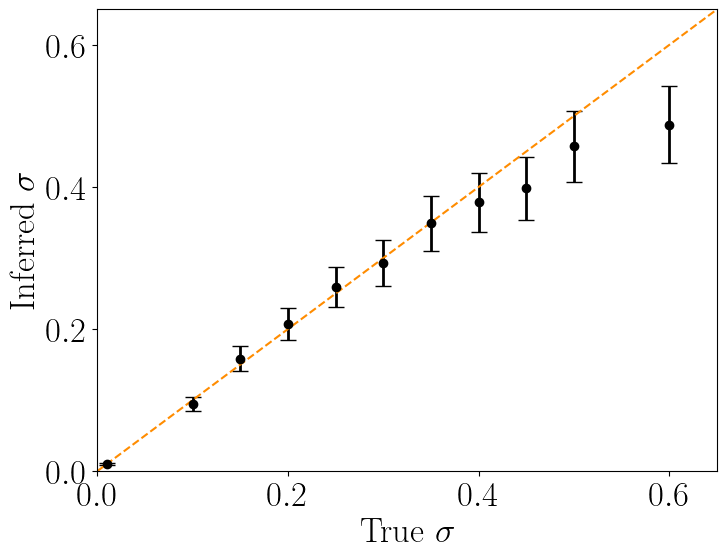

In [7]:
plt.rc('font', size=25, family='serif')
plt.rc('text', usetex=True)

plt.figure(figsize=(8, 6))

plt.errorbar(sigmas, sigmas_map, sigmas_err_brute, fmt='o', linewidth=2, color='k', capsize=6)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), '--', color='darkorange')
plt.xlabel(r'True $\sigma$')
plt.ylabel(r'Inferred $\sigma$')
plt.ylim([0, 0.65])
plt.xlim([0, 0.65])
plt.savefig('Figures/sim_sigma.pdf', bbox_inches="tight")
plt.show()
